**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.cluster.hierarchy import ward, linkage, dendrogram
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import nltk, string, re, json
nltk.download('inaugural')
from nltk.corpus import inaugural
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import random
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

[nltk_data] Error loading inaugural: <urlopen error [WinError 10061]
[nltk_data]     No connection could be made because the target machine
[nltk_data]     actively refused it>


### PROBLEM 1

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

***1.1) Read the dataset. Do the descriptive statistics and do null value condition check.***

***>> Read Data***

In [3]:
elections_df = pd.read_excel('Election_Data.xlsx', sheet_name=1, index_col=0)
elections_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


***Descriptive Statistics***

In [4]:
elections_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [5]:
# 75% of observations have voters' avg age 67, min 24, max as high as 93
# 50% of observations of economic.cond.national 3.0 and 75% - 4.0
# Blair & Hague (assessment of labour & Conservative leaders) same scores
# Europe - most of observations have 10.0 (Highly ‘Eurosceptic’)

In [6]:
elections_df.select_dtypes('object').describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [7]:
elections_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

***1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts)***

***>>Shape & Info***

In [8]:
elections_df.shape

(1525, 9)

In [9]:
elections_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


***>>Duplicates***

In [10]:
elections_df.duplicated().sum()

8

In [11]:
print("There are {} duplicates".format(elections_df.duplicated().sum()))
elections_df.drop_duplicates(inplace=True)
print("There are {} duplicates".format(elections_df.duplicated().sum()))

There are 8 duplicates
There are 0 duplicates


In [12]:
elections_df.shape

(1517, 9)

In [13]:
elections_df.vote.value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

***>>Null values***

In [14]:
elections_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

***>> Univariate Analysis***

In [15]:
discrete_cols = ['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe','political.knowledge']
num_cols = ['age']
obj_cols = ['vote', 'gender']

AGE


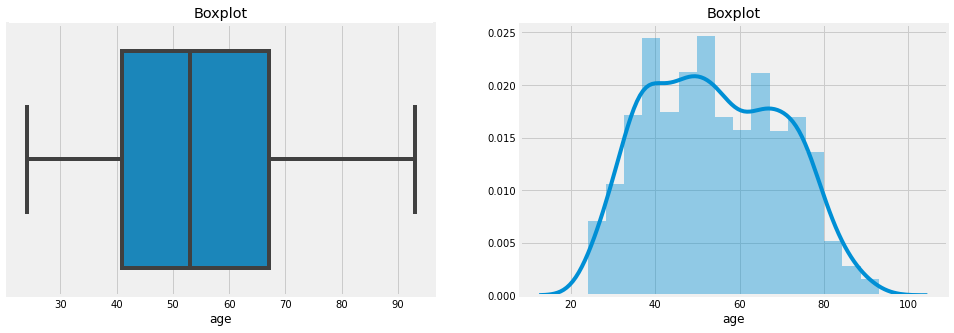


-----------------------------------------------------------------------------------
ECONOMIC.COND.NATIONAL 	Unique no of values 5 

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64


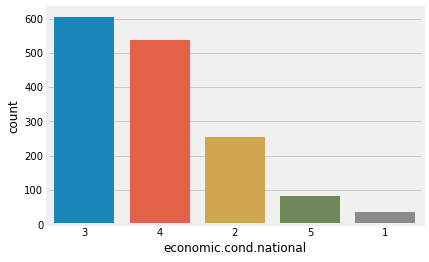


------------------------------------------------------------------------------------
ECONOMIC.COND.HOUSEHOLD 	Unique no of values 5 

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


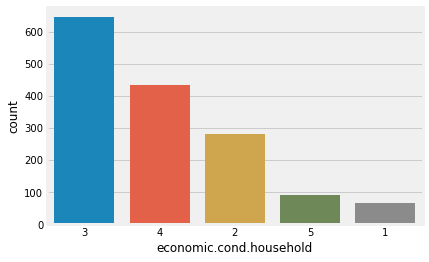


------------------------------------------------------------------------------------
BLAIR 	Unique no of values 5 

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64


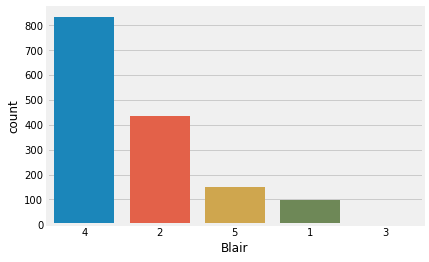


------------------------------------------------------------------------------------
HAGUE 	Unique no of values 5 

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64


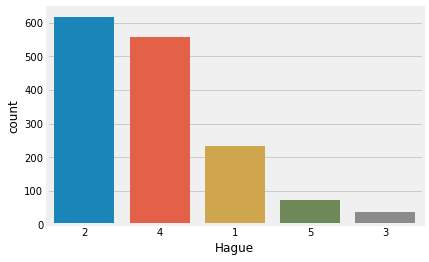


------------------------------------------------------------------------------------
EUROPE 	Unique no of values 11 

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64


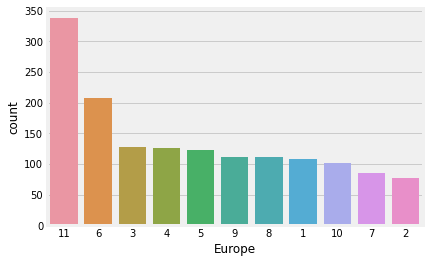


------------------------------------------------------------------------------------
POLITICAL.KNOWLEDGE 	Unique no of values 4 

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64


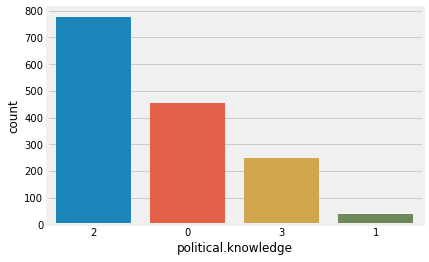


------------------------------------------------------------------------------------
VOTE 	Unique no of values 2 

Labour          1057
Conservative     460
Name: vote, dtype: int64


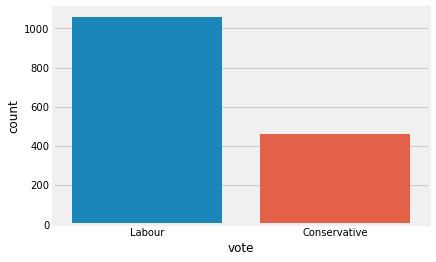


------------------------------------------------------------------------------------
GENDER 	Unique no of values 2 

female    808
male      709
Name: gender, dtype: int64


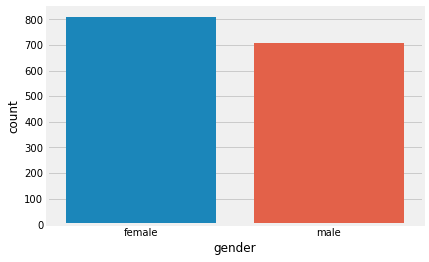


------------------------------------------------------------------------------------


In [16]:
for col in num_cols:
    print('AGE')
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15,5)
    
    a = sns.boxplot(elections_df['age'], ax=axes[0])
    a.set_title('Boxplot')
    
    a = sns.distplot(elections_df['age'], ax=axes[1])
    a.set_title('Boxplot')
    plt.show()
    print('\n-----------------------------------------------------------------------------------')

for col in discrete_cols:    
    print(col.upper(), '\tUnique no of values', elections_df[col].nunique(),'\n')
    print(elections_df[col].value_counts())
    sns.countplot(elections_df[col], order=elections_df[col].value_counts().index);
    plt.show()
    print('\n------------------------------------------------------------------------------------')

for col in obj_cols:    
    print(col.upper(), '\tUnique no of values', elections_df[col].nunique(),'\n')
    print(elections_df[col].value_counts())
    sns.countplot(elections_df[col], order=elections_df[col].value_counts().index);
    plt.show()
    print('\n------------------------------------------------------------------------------------')    

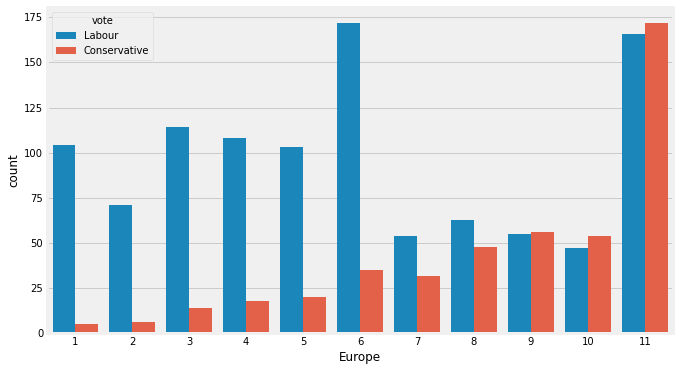

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Europe', hue = 'vote', data = elections_df);

***>> Bivariate Analysis***

VOTE vs. AGE 



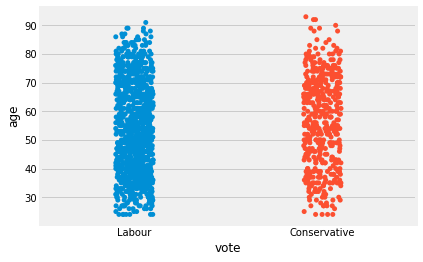


------------------------------------------------------------------------
GENDER vs. AGE 



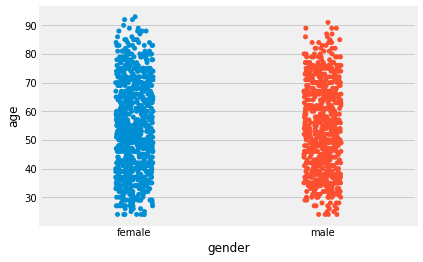


------------------------------------------------------------------------


In [18]:
for col in obj_cols:
    print(col.upper(), 'vs. AGE','\n')
    sns.stripplot(elections_df[col], elections_df['age'], jitter=True);
    plt.show()
    print('\n------------------------------------------------------------------------')

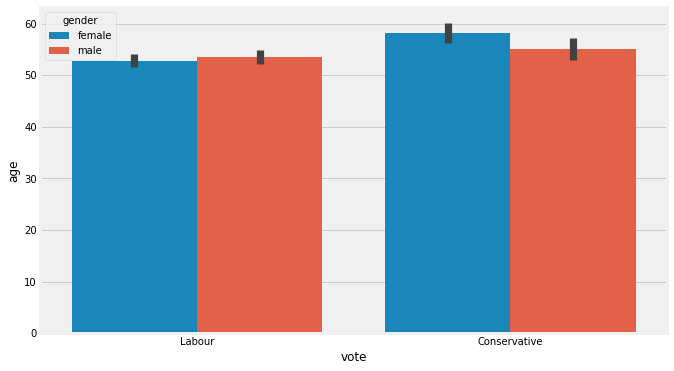

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'vote', y = 'age', hue = 'gender', data = elections_df);

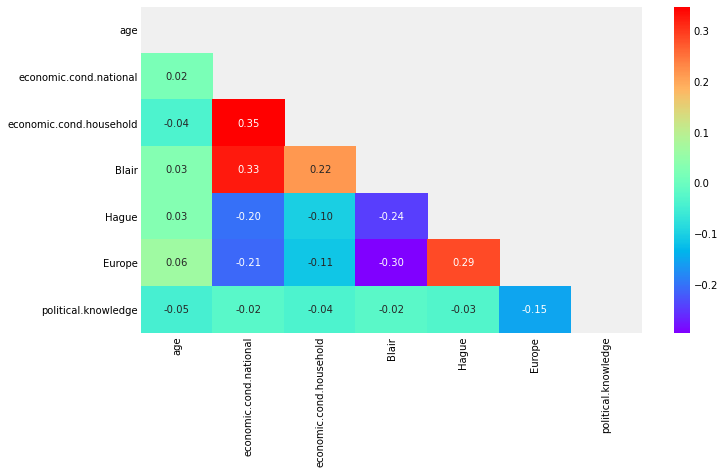

In [20]:
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(elections_df.corr(method='pearson')))
sns.heatmap(elections_df.corr(), annot=True, fmt='.2f', cmap='rainbow', mask=mask);

***>> Outlier check***

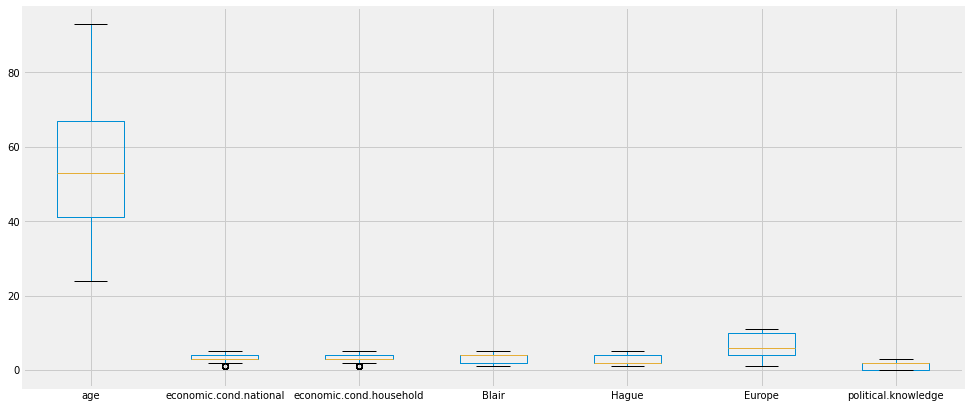

In [22]:
elections_df.boxplot(figsize=(15,7));

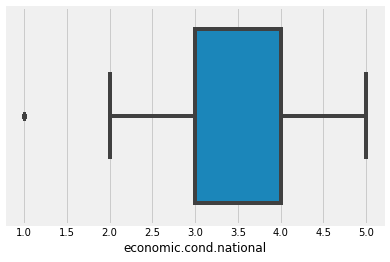

In [23]:
sns.boxplot(elections_df['economic.cond.national']);

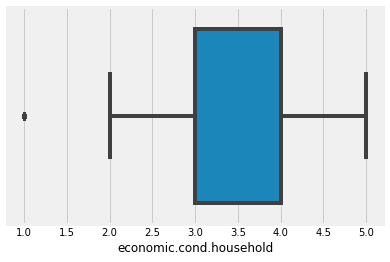

In [24]:
sns.boxplot(elections_df['economic.cond.household']);

In [25]:
# The outliers are just the min scores 1 => not treated for now 

***1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 3 pts), Data Split: Split the data into train and test (70:30) (2 pts).***

***>> Encoding data having string values***

In [26]:
elections_df.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male


In [27]:
elections_df = pd.get_dummies(elections_df, columns=['gender'], drop_first=True)
elections_df.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1,Labour,43,3,3,4,1,2,2,0
2,Labour,36,4,4,4,4,5,2,1
3,Labour,35,4,4,5,2,3,2,1


In [28]:
le = LabelEncoder()
elections_df['vote'] = le.fit_transform(elections_df['vote'])
elections_df.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1,1,43,3,3,4,1,2,2,0
2,1,36,4,4,4,4,5,2,1
3,1,35,4,4,5,2,3,2,1


In [29]:
elections_df['vote'].unique()
#Labour                1          
#Conservative          0

array([1, 0])

***>> Is Scaling necessary here or not?***

In [30]:
# Naive Bayes - main condition - features need to be independent of each other, so scale doesn't matter
# KNN - Distance measures are invovled => yes
# Logistic Regression - Gradient descent => yes
# LDA - Linear combo of predictors, variance b/w groups => yes

***>>Data Split***

In [31]:
X = elections_df.drop(['vote'],axis=1)
y = elections_df['vote']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [33]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = zscore(X_train_scaled['age'])
X_test_scaled = X_test.copy()
X_test_scaled['age'] = zscore(X_test_scaled['age'])

In [34]:
X_train_scaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
388,0.557746,2,2,4,4,5,3,1
237,-1.475167,3,3,2,3,6,0,0
124,0.176575,4,4,4,2,11,2,0
97,-0.839882,3,3,4,4,5,2,0
212,-0.585768,3,3,2,2,2,1,0


***1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (3 pts). Interpret the inferences of both models (2 pts)***

***>>> Logistic Regression Model***

In [35]:
logreg_model = LogisticRegression()

In [36]:
logreg_model.fit(X_train_scaled, y_train)
print("Training accuracy:\t",logreg_model.score(X_train_scaled, y_train))
logreg_model.fit(X_test_scaled, y_test)
print("Testing accuracy:\t",logreg_model.score(X_test_scaled, y_test))

Training accuracy:	 0.8407163053722903
Testing accuracy:	 0.8442982456140351


***>>> Linear Discriminant Analysis Model***

In [37]:
lda_model = LinearDiscriminantAnalysis()

In [38]:
#With scaled input data
lda_model.fit(X_train_scaled, y_train)
print("Training accuracy:\t",lda_model.score(X_train_scaled, y_train))
lda_model.fit(X_test_scaled, y_test)
print("Testing accuracy:\t",lda_model.score(X_test_scaled, y_test))

Training accuracy:	 0.8378887841658812
Testing accuracy:	 0.8486842105263158


In [39]:
#Without scaled input data
lda_model.fit(X_train, y_train)
print("Training accuracy:\t",lda_model.score(X_train, y_train))
lda_model.fit(X_test, y_test)
print("Testing accuracy:\t",lda_model.score(X_test, y_test))

Training accuracy:	 0.8378887841658812
Testing accuracy:	 0.8486842105263158


In [40]:
#It appears that scaling has no influence

***1.5) Apply KNN Model and Naïve Bayes Model(5 pts). Interpret the inferences of each model (2 pts)***

***>> KNN Model***

In [41]:
knn_model = KNeighborsClassifier()

In [42]:
knn_model.fit(X_train_scaled, y_train)
print("Training accuracy:\t",knn_model.score(X_train_scaled, y_train))
knn_model.fit(X_test_scaled, y_test)
print("Testing accuracy:\t",knn_model.score(X_test_scaled, y_test))

Training accuracy:	 0.8680490103675778
Testing accuracy:	 0.8464912280701754


In [43]:
scores = []
for i in range(1,20,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_scaled, y_train)
    scores.append(knn_model.score(X_test_scaled, y_test))
MCE = [1-x for x in scores]

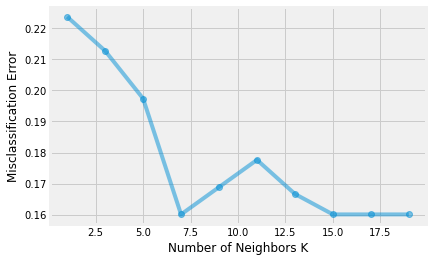

In [95]:
plt.plot(range(1,20,2), MCE, alpha = 0.5, marker = 'o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [45]:
# Lowest MCE is for 7,15,17,19

In [46]:
# Neighbours=7

In [96]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)
print("Training accuracy:\t",knn_model.score(X_train_scaled, y_train))
knn_model.fit(X_test_scaled, y_test)
print("Testing accuracy:\t",knn_model.score(X_test_scaled, y_test))

Training accuracy:	 0.8576814326107446
Testing accuracy:	 0.8399122807017544


In [48]:
# Neighbours=15

In [98]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_scaled, y_train)
print("Training accuracy:\t",knn_model.score(X_train_scaled, y_train))
knn_model.fit(X_test_scaled, y_test)
print("Testing accuracy:\t",knn_model.score(X_test_scaled, y_test))

Training accuracy:	 0.8444863336475024
Testing accuracy:	 0.8421052631578947


***>> Naive Bayes***

In [50]:
naive_bayes_model = GaussianNB()

In [51]:
naive_bayes_model.fit(X_train, y_train)
print("Training accuracy:\t",naive_bayes_model.score(X_train, y_train))
naive_bayes_model.fit(X_test, y_test)
print("Testing accuracy:\t",naive_bayes_model.score(X_test, y_test))

Training accuracy:	 0.8312912346842601
Testing accuracy:	 0.8289473684210527


***1.6) Model Tuning (2 pts) , Bagging ( 2.5 pts) and Boosting (2.5 pts).***

In [52]:
model_params = { 'Logistic_Regression': 
                    { 'classifier': LogisticRegression(),
                      'params': {'penalty': ['l1', 'l2', 'none'],
                                 'tol' : [0.00000000000000001, 0.000000001, 0.0001],
                                 'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                                 'max_iter': [10000],
                                 'n_jobs': [2,4,6]
                                }
                    },
                
                'LDA': 
                    {
                      'classifier':  LinearDiscriminantAnalysis(),
                      'params': { 'solver': ['svd', 'lsqr', 'eigen'],
                                  'tol' : [0.00000000000000001, 0.000000001, 0.0001]
                                }  
                    },
                
                'Naive_Bayes': 
                    {
                      'classifier': GaussianNB(),
                      'params': { 'priors': [[0.5,0.5],[0.75,0.25],[0.25,0.75],[0.85,0.15],[0.15,0.85]],
                                  'var_smoothing': [1e-09, 1e-10, 1e-17]
                                }  
                    },
                
                'KNN': 
                    {
                      'classifier': KNeighborsClassifier(),
                      'params': { 'n_neighbors' : np.arange(1,20,2),
                                  'metric': ['minkowski', 'euclidean']
                                }  
                    },
                
                'Random_Forest': 
                    {
                      'classifier': RandomForestClassifier(),
                       'params': { 'n_estimators': np.arange(500,2000,100),
                                   'criterion': ["gini", "entropy"],
                                   'max_depth':np.arange(5,60,10),
                                   'min_samples_leaf': np.arange(5,60,10),
                                   'min_samples_split': np.arange(10,60,10),
                                    'bootstrap':[True, False]
                                 } 
                    },
                
                'Bagging': 
                    {
                      'classifier': BaggingClassifier(base_estimator=DecisionTreeClassifier()),
                       'params': { 'n_estimators': np.arange(100,1000,100),
                                   'bootstrap':[True, False],
                                   'n_jobs': [2,4,6]
                                 } 
                    },
                
                'AdaBoosting':
                    {
                     'classifier': AdaBoostClassifier(),
                      'params': { 'n_estimators': np.arange(100,1000,100),
                                   'learning_rate':[0.0000001, 0.0001, 0.1]
                                 }  
                    }
    
            }

In [53]:
performance = []
for model, grid in model_params.items():
    rcv_search = RandomizedSearchCV(estimator = grid['classifier'],
                                    param_distributions = grid['params'],
                                    scoring = 'accuracy',
                                    cv = 10)
        
    if model in ['Logistic_Regression', 'KNN']:  
        rcv_search.fit( X_train_scaled, y_train)
    else:
        rcv_search.fit( X_train, y_train)
        
    performance.append({ 'model': model,
                        'Best_Params': rcv_search.best_params_,
                        'Best Score': rcv_search.best_score_
                        })

In [54]:
model_performance_df = pd.DataFrame(performance)
model_performance_df = model_performance_df.sort_values('Best Score', ascending=False).reset_index().drop('index', axis=1)
model_performance_df

,model,Best_Params,Best Score
0,Random_Forest,"{'n_estimators': 1200, 'min_samples_split': 40...",0.835047
1,Logistic_Regression,"{'tol': 1e-17, 'solver': 'liblinear', 'penalty...",0.835029
2,AdaBoosting,"{'n_estimators': 100, 'learning_rate': 0.1}",0.832217
3,LDA,"{'tol': 1e-17, 'solver': 'lsqr'}",0.830321
4,Naive_Bayes,"{'var_smoothing': 1e-10, 'priors': [0.25, 0.75]}",0.827482
5,KNN,"{'n_neighbors': 19, 'metric': 'minkowski'}",0.822783
6,Bagging,"{'n_jobs': 4, 'n_estimators': 200, 'bootstrap'...",0.818057


In [61]:
model_performance_df.iloc[6,1]

{'n_jobs': 4, 'n_estimators': 200, 'bootstrap': True}

In [62]:
logreg_best_model = LogisticRegression(tol= 1e-17, solver='liblinear', penalty='l2', n_jobs=6, max_iter=10000)
knn_best_model = KNeighborsClassifier(n_neighbors=19, metric='minkowski')
rf_best_model = RandomForestClassifier(n_estimators=1200, min_samples_split=40, min_samples_leaf=5, max_depth=5, criterion='entropy',bootstrap=False)
lda_best_model = LinearDiscriminantAnalysis(tol=1e-17, solver='lsqr')
nb_best_model = GaussianNB(var_smoothing=1e-10, priors=[0.25, 0.75])
adaboost_best_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
bagging_best_model = BaggingClassifier(n_jobs=4, n_estimators=200, bootstrap=True)

In [64]:
logreg_best_model.fit(X_train_scaled, y_train)
knn_best_model.fit(X_train_scaled, y_train)
lda_best_model.fit(X_train, y_train)
rf_best_model.fit(X_train, y_train)
nb_best_model.fit(X_train, y_train)
adaboost_best_model.fit(X_train, y_train)
bagging_best_model.fit(X_train, y_train)

BaggingClassifier(n_estimators=200, n_jobs=4)

***1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (4 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized (3 pts)***

In [65]:
# LOGISTIC REGRESSION PREDICTIONS
y_train_pred_log = logreg_best_model.predict(X_train_scaled)
y_test_pred_log = logreg_best_model.predict(X_test_scaled)
y_train_pred_prob_log = logreg_best_model.predict_proba(X_train_scaled)[:,1]
y_test_pred_prob_log = logreg_best_model.predict_proba(X_test_scaled)[:,1]

# LDA  PREDICTIONS
y_train_pred_lda = lda_best_model.predict(X_train)
y_test_pred_lda = lda_best_model.predict(X_test)
y_train_pred_prob_lda = lda_best_model.predict_proba(X_train)[:,1]
y_test_pred_prob_lda = lda_best_model.predict_proba(X_test)[:,1]

# KNN  PREDICTIONS
y_train_pred_knn = knn_best_model.predict(X_train_scaled)
y_test_pred_knn = knn_best_model.predict(X_test_scaled)
y_train_pred_prob_knn = knn_best_model.predict_proba(X_train_scaled)[:,1]
y_test_pred_prob_knn = knn_best_model.predict_proba(X_test_scaled)[:,1]

# RANDOM FOREST  PREDICTIONS
y_train_pred_rf = rf_best_model.predict(X_train)
y_test_pred_rf = rf_best_model.predict(X_test)
y_train_pred_prob_rf = rf_best_model.predict_proba(X_train)[:,1]
y_test_pred_prob_rf = rf_best_model.predict_proba(X_test)[:,1]

# NAIVE BAYES  PREDICTIONS
y_train_pred_nb = nb_best_model.predict(X_train)
y_test_pred_nb = nb_best_model.predict(X_test)
y_train_pred_prob_nb = nb_best_model.predict_proba(X_train)[:,1]
y_test_pred_prob_nb = nb_best_model.predict_proba(X_test)[:,1]

#  BAGGING  PREDICTIONS
y_train_pred_bag = bagging_best_model.predict(X_train)
y_test_pred_bag = bagging_best_model.predict(X_test)
y_train_pred_prob_bag = bagging_best_model.predict_proba(X_train)[:,1]
y_test_pred_prob_bag = bagging_best_model.predict_proba(X_test)[:,1]

#  ADABOOSTING  PREDICTIONS
y_train_pred_adaboost = adaboost_best_model.predict(X_train)
y_test_pred_adaboost = adaboost_best_model.predict(X_test)
y_train_pred_prob_adaboost = adaboost_best_model.predict_proba(X_train)[:,1]
y_test_pred_prob_adaboost = adaboost_best_model.predict_proba(X_test)[:,1]

In [108]:
acc_train = []; acc_test = []
f1_train = []; f1_test = []
recall_train = []; recall_test = []
auc_train = []; auc_test = []
model_names = model_params.keys()
models = [logreg_best_model, lda_best_model, knn_best_model, rf_best_model, nb_best_model, bagging_best_model, adaboost_best_model]

In [109]:
def get_performance_metrics(model_names, pred_set, pred_prob_set, y_data):
    
    accuracy = []; f1_score=[]; recall = []; auc_score = []
    
    for name, pred, pred_prob in zip(model_names, pred_set, pred_prob_set):
        print(name.upper(),"\n\nClassification Report\n")
        report = classification_report(y_data, pred, output_dict=True)
        accuracy.append(report['accuracy'])
        print("Accuracy:\t", round(report['accuracy']*100,2), '%\n')
        f1_score.append(report['1']['f1-score'])
        recall.append(report['1']['recall'])
        auc_score.append(roc_auc_score(y_data, pred_prob))
        print(classification_report(y_data, pred))
        print("\nConfusion Matrix\n")
        sns.heatmap(confusion_matrix(y_data, pred), annot=True, fmt='d', yticklabels=['Conservative', 'Labour'],
                   xticklabels=['Conservative', 'Labour'])
        plt.show()
        print("-------------------------------------------------------------------------------------------------------")
        
    print("ROC AUC Curve:\n")
    plt.figure(figsize=(12,10))
    for name, pred_prob in zip(model_names, pred_prob_set):
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        print('AUC Score',name.ljust(40), roc_auc_score(y_data, pred_prob))
        fpr, tpr, thresh = roc_curve(y_data, pred_prob)
        plt.plot([0,1],[0,1], linestyle = '--')
        plt.plot(fpr, tpr, alpha = 0.5, label = name, c=color)
        plt.legend(loc='best')
        
         
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()   
    
    return accuracy, auc_score, f1_score, recall

***Performance on Train Set***

LOGISTIC_REGRESSION 

Classification Report

Accuracy:	 84.07 %

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       311
           1       0.87      0.91      0.89       750

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061


Confusion Matrix



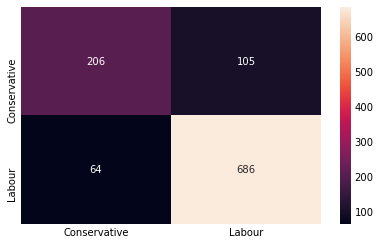

-------------------------------------------------------------------------------------------------------
LDA 

Classification Report

Accuracy:	 83.79 %

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       311
           1       0.87      0.91      0.89       750

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061


Confusion Matrix



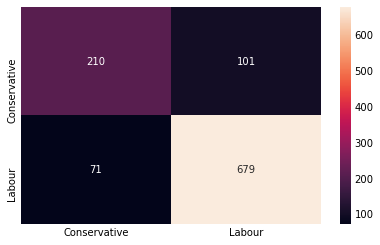

-------------------------------------------------------------------------------------------------------
NAIVE_BAYES 

Classification Report

Accuracy:	 83.79 %

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       311
           1       0.87      0.91      0.89       750

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061


Confusion Matrix



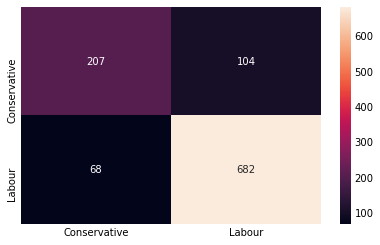

-------------------------------------------------------------------------------------------------------
KNN 

Classification Report

Accuracy:	 85.86 %

              precision    recall  f1-score   support

           0       0.82      0.66      0.73       311
           1       0.87      0.94      0.90       750

    accuracy                           0.86      1061
   macro avg       0.85      0.80      0.82      1061
weighted avg       0.86      0.86      0.85      1061


Confusion Matrix



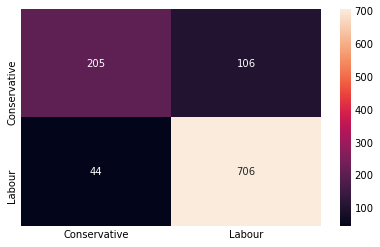

-------------------------------------------------------------------------------------------------------
RANDOM_FOREST 

Classification Report

Accuracy:	 83.03 %

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       311
           1       0.86      0.90      0.88       750

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061


Confusion Matrix



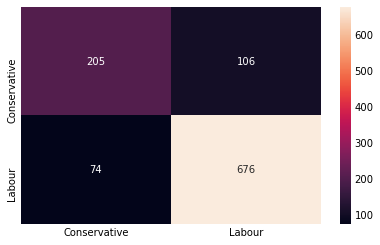

-------------------------------------------------------------------------------------------------------
BAGGING 

Classification Report

Accuracy:	 100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       750

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061


Confusion Matrix



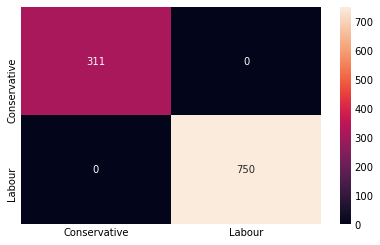

-------------------------------------------------------------------------------------------------------
ADABOOSTING 

Classification Report

Accuracy:	 83.41 %

              precision    recall  f1-score   support

           0       0.77      0.61      0.68       311
           1       0.85      0.93      0.89       750

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061


Confusion Matrix



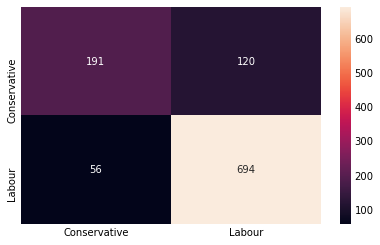

-------------------------------------------------------------------------------------------------------
ROC AUC Curve:

AUC Score Logistic_Regression                      0.8861779206859592
AUC Score LDA                                      0.8863751339764201
AUC Score Naive_Bayes                              0.9035241157556271
AUC Score KNN                                      0.9199657020364416
AUC Score Random_Forest                            0.8815777063236871
AUC Score Bagging                                  1.0
AUC Score AdaBoosting                              0.8969560557341907


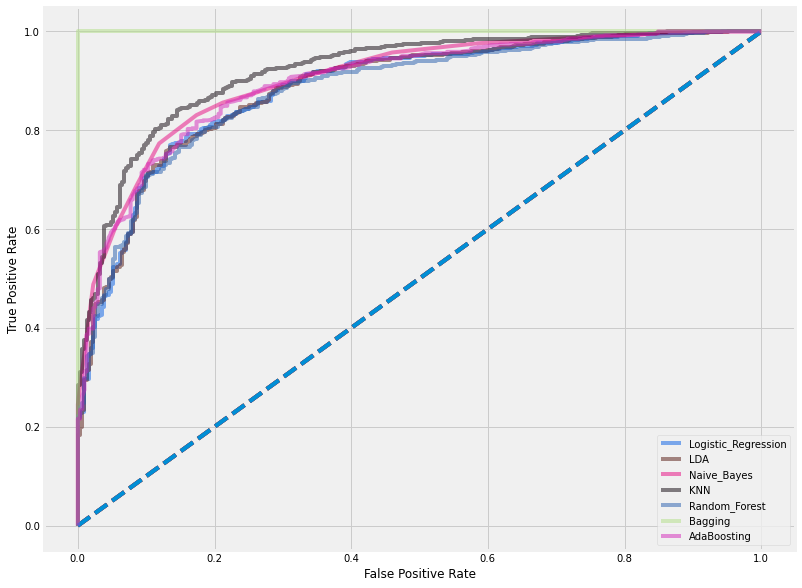

In [111]:
pred_set = [y_train_pred_log, y_train_pred_lda, y_train_pred_knn, y_train_pred_rf, 
            y_train_pred_nb, y_train_pred_bag, y_train_pred_adaboost]

pred_prob_set = [y_train_pred_prob_log, y_train_pred_prob_lda, y_train_pred_prob_knn,
                y_train_pred_prob_rf, y_train_pred_prob_nb, y_train_pred_prob_bag, y_train_pred_prob_adaboost]

acc_train, auc_train, f1_train, recall_train = get_performance_metrics(model_names, pred_set, pred_prob_set, y_train)

***Performance on Test Set***

LOGISTIC_REGRESSION 

Classification Report

Accuracy:	 82.89 %

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       149
           1       0.85      0.90      0.88       307

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456


Confusion Matrix



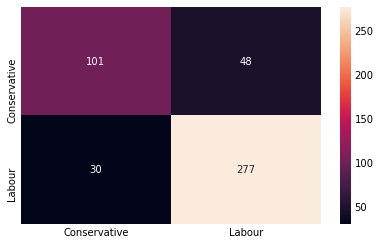

-------------------------------------------------------------------------------------------------------
LDA 

Classification Report

Accuracy:	 82.89 %

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       149
           1       0.86      0.89      0.88       307

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456


Confusion Matrix



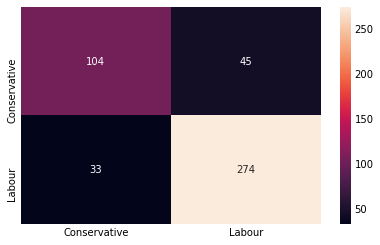

-------------------------------------------------------------------------------------------------------
NAIVE_BAYES 

Classification Report

Accuracy:	 83.99 %

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       149
           1       0.86      0.91      0.88       307

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456


Confusion Matrix



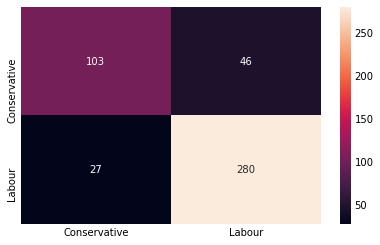

-------------------------------------------------------------------------------------------------------
KNN 

Classification Report

Accuracy:	 82.89 %

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       149
           1       0.84      0.92      0.88       307

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.79       456
weighted avg       0.83      0.83      0.82       456


Confusion Matrix



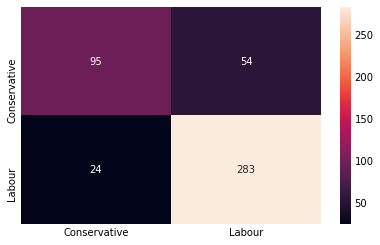

-------------------------------------------------------------------------------------------------------
RANDOM_FOREST 

Classification Report

Accuracy:	 83.33 %

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       149
           1       0.87      0.89      0.88       307

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456


Confusion Matrix



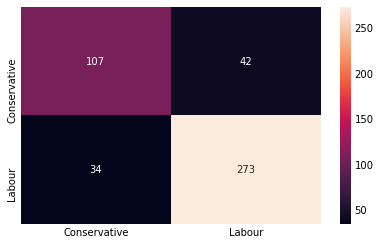

-------------------------------------------------------------------------------------------------------
BAGGING 

Classification Report

Accuracy:	 79.61 %

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       149
           1       0.83      0.88      0.85       307

    accuracy                           0.80       456
   macro avg       0.77      0.75      0.76       456
weighted avg       0.79      0.80      0.79       456


Confusion Matrix



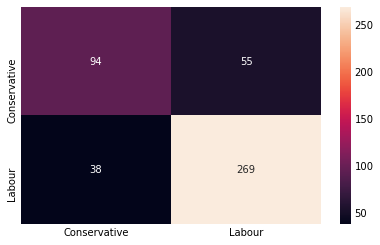

-------------------------------------------------------------------------------------------------------
ADABOOSTING 

Classification Report

Accuracy:	 82.89 %

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       149
           1       0.84      0.92      0.88       307

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.79       456
weighted avg       0.83      0.83      0.82       456


Confusion Matrix



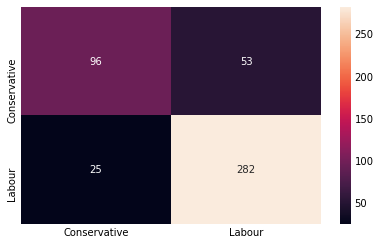

-------------------------------------------------------------------------------------------------------
ROC AUC Curve:

AUC Score Logistic_Regression                      0.8932404958135671
AUC Score LDA                                      0.892606519030234
AUC Score Naive_Bayes                              0.9085324530529262
AUC Score KNN                                      0.9036683208359749
AUC Score Random_Forest                            0.8939619176704632
AUC Score Bagging                                  0.8789869488227708
AUC Score AdaBoosting                              0.8946396169905777


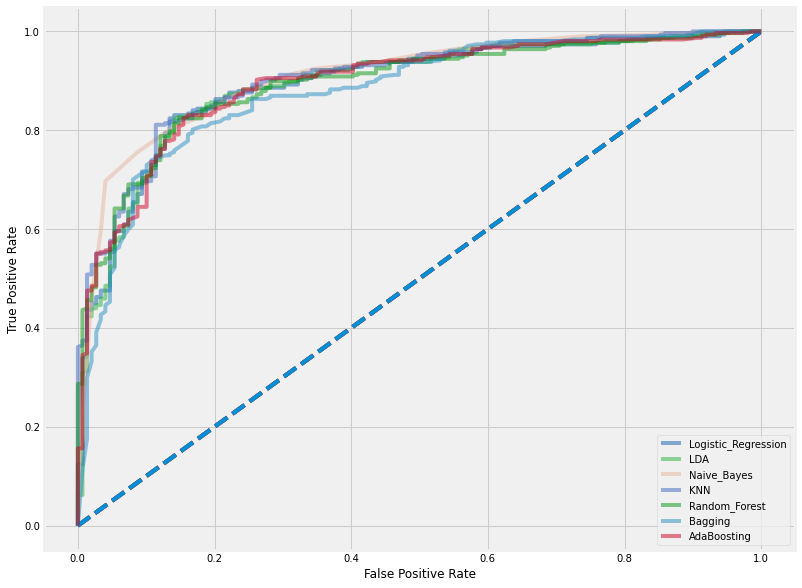

In [112]:
pred_set = [y_test_pred_log, y_test_pred_lda, y_test_pred_knn, y_test_pred_rf, 
            y_test_pred_nb, y_test_pred_bag, y_test_pred_adaboost]

pred_prob_set = [y_test_pred_prob_log, y_test_pred_prob_lda, y_test_pred_prob_knn,
                y_test_pred_prob_rf, y_test_pred_prob_nb, y_test_pred_prob_bag, y_test_pred_prob_adaboost]

acc_test, auc_test, f1_test, recall_test = get_performance_metrics(model_names, pred_set, pred_prob_set, y_test)

In [114]:
metrics_df = pd.DataFrame([ np.round([i*100 for i in recall_train],2), np.round([i*100 for i in recall_test],2),
                            np.round([i*100 for i in f1_train],2), np.round([i*100 for i in f1_test],2),
                            np.round([i*100 for i in acc_train],2), np.round([i*100 for i in acc_test],2), 
                            np.round([i*100 for i in auc_train],2), np.round([i*100 for i in auc_test],2)],                                        
                            columns=model_names,
                            index = ['Recall_Train', 'Recall_Test',
                                     'F1_Train', 'F1_Test',
                                     'Accuracy_Train', 'Accuracy_Test', 
                                     'AUC_Score_Train', 'AUC_Score_Test'])
metrics_df

,Logistic_Regression,LDA,Naive_Bayes,KNN,Random_Forest,Bagging,AdaBoosting
Recall_Train,91.47,90.53,90.93,94.13,90.13,100.00,92.53
Recall_Test,90.23,89.25,91.21,92.18,88.93,87.62,91.86
F1_Train,89.03,88.76,88.80,90.40,88.25,100.00,88.75
F1_Test,87.66,87.54,88.47,87.89,87.78,85.26,87.85
Accuracy_Train,84.07,83.79,83.79,85.86,83.03,100.00,83.41
Accuracy_Test,82.89,82.89,83.99,82.89,83.33,79.61,82.89
AUC_Score_Train,88.62,88.64,90.35,92.00,88.16,100.00,89.70
AUC_Score_Test,89.32,89.26,90.85,90.37,89.40,87.90,89.46


In [71]:
# KNN best model

***1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.***

In [72]:
pd.DataFrame(rf_best_model.feature_importances_, columns=['Imp'], index=X_train.columns).sort_values(['Imp'],ascending=False)

,Imp
Hague,0.330848
Blair,0.230758
Europe,0.201656
economic.cond.national,0.078300
political.knowledge,0.067236
age,0.055423
economic.cond.household,0.031617
gender_male,0.004162


### PROBLEM 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

    President Franklin D. Roosevelt in 1941
    President John F. Kennedy in 1961
    President Richard Nixon in 1973


***2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)***

In [116]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [74]:
def find_info(textid):
    print("No. of characters:\t\t", len(inaugural.raw(textid)))
    print("No. of words:\t\t", len(inaugural.words(textid)))
    print("No. of sentences:\t\t", len(inaugural.sents(textid)))

In [75]:
print("Roosevelt Speech\n")
find_info('1941-Roosevelt.txt')
print("\n-----------------------------------------------")
print("Kennedy Speech\n")
find_info('1961-Kennedy.txt')
print("\n-----------------------------------------------")
print("Nixon Speech\n")
find_info('1973-Nixon.txt')

Roosevelt Speech

No. of characters:		 7571
No. of words:		 1536
No. of sentences:		 68

-----------------------------------------------
Kennedy Speech

No. of characters:		 7618
No. of words:		 1546
No. of sentences:		 52

-----------------------------------------------
Nixon Speech

No. of characters:		 9991
No. of words:		 2028
No. of sentences:		 69


In [76]:
roosevelt = inaugural.raw('1941-Roosevelt.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
nixon = inaugural.raw('1973-Nixon.txt')

***2.2) Remove all the stopwords from the three speeches.***

In [77]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)

In [78]:
stemmer = SnowballStemmer('english')

In [79]:
def myTokenizer(text):
    token_temps = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in token_temps:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    ret_tokens = [stemmer.stem(t) for t in tokens]        
    ret_tokens = [token for token in ret_tokens if token not in stopwords]
    return ret_tokens

In [80]:
roosevelt1 = myTokenizer(roosevelt)
roosevelt1

['nation',
 'day',
 'inaugur',
 'sinc',
 'peopl',
 'renew',
 'sens',
 'dedic',
 'unit',
 'state',
 'washington',
 "'s",
 'day',
 'task',
 'peopl',
 'creat',
 'weld',
 'togeth',
 'nation',
 'lincoln',
 "'s",
 'day',
 'task',
 'peopl',
 'preserv',
 'nation',
 'disrupt',
 'within',
 'day',
 'task',
 'peopl',
 'save',
 'nation',
 'institut',
 'disrupt',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happen',
 'paus',
 'moment',
 'take',
 'stock',
 'recal',
 'place',
 'histori',
 'rediscov',
 'may',
 'risk',
 'real',
 'peril',
 'inact',
 'live',
 'nation',
 'determin',
 'count',
 'year',
 'lifetim',
 'human',
 'spirit',
 'life',
 'man',
 'three-scor',
 'year',
 'ten',
 'littl',
 'littl',
 'less',
 'life',
 'nation',
 'full',
 'measur',
 'live',
 'men',
 'doubt',
 'men',
 'believ',
 'democraci',
 'form',
 'govern',
 'frame',
 'life',
 'limit',
 'measur',
 'kind',
 'mystic',
 'artifici',
 'fate',
 'unexplain',
 'reason',
 'tyranni',
 'slaveri',
 'becom',
 'surg',
 'wave',
 'futur'

In [81]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [82]:
kennedy1 = myTokenizer(kennedy)
kennedy1

['vice',
 'presid',
 'johnson',
 'mr.',
 'speaker',
 'mr.',
 'chief',
 'justic',
 'presid',
 'eisenhow',
 'vice',
 'presid',
 'nixon',
 'presid',
 'truman',
 'reverend',
 'clergi',
 'fellow',
 'citizen',
 'observ',
 'today',
 'victori',
 'parti',
 'celebr',
 'freedom',
 'symbol',
 'end',
 'well',
 'begin',
 'signifi',
 'renew',
 'well',
 'chang',
 'sworn',
 'befor',
 'almighti',
 'god',
 'solemn',
 'oath',
 'forebear',
 'l',
 'prescrib',
 'near',
 'centuri',
 'three',
 'quarter',
 'ago',
 'world',
 'veri',
 'differ',
 'man',
 'hold',
 'mortal',
 'hand',
 'power',
 'abolish',
 'form',
 'human',
 'poverti',
 'form',
 'human',
 'life',
 'yet',
 'revolutionari',
 'belief',
 'forebear',
 'fought',
 'still',
 'issu',
 'around',
 'globe',
 'belief',
 'right',
 'man',
 'come',
 'generos',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heir',
 'first',
 'revolut',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alik',
 'torch',
 'pass',
 'new',
 'generat',


In [83]:
nixon1 = myTokenizer(nixon)
nixon1 

['mr.',
 'vice',
 'presid',
 'mr.',
 'speaker',
 'mr.',
 'chief',
 'justic',
 'senat',
 'cook',
 'mrs.',
 'eisenhow',
 'fellow',
 'citizen',
 'great',
 'good',
 'countri',
 'share',
 'togeth',
 'met',
 'four',
 'year',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depress',
 'prospect',
 'seem',
 'endless',
 'war',
 'abroad',
 'destruct',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peac',
 'world',
 'central',
 'question',
 'befor',
 'us',
 'shall',
 'use',
 'peac',
 'let',
 'us',
 'resolv',
 'era',
 'enter',
 'postwar',
 'period',
 'often',
 'time',
 'retreat',
 'isol',
 'lead',
 'stagnat',
 'home',
 'invit',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolv',
 'becom',
 'time',
 'great',
 'respons',
 'great',
 'born',
 'renew',
 'spirit',
 'promis',
 'america',
 'enter',
 'third',
 'centuri',
 'nation',
 'past',
 'year',
 'saw',
 'far-reach',
 'result',
 'new',
 'polici',
 'peac',
 'continu',
 'revit',
 'tradit',
 'friendship',
 'mission',
 'pe

***2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)***

In [84]:
def find_freq_words(speech):
    words_freq = nltk.FreqDist(speech)
    most_common = [words[0] for words in words_freq.most_common(3)]
    return most_common

In [85]:
find_freq_words(roosevelt1)

['nation', 'know', 'peopl']

In [86]:
find_freq_words(kennedy1)

['let', 'us', 'power']

In [87]:
find_freq_words(nixon1)

['us', 'let', 'america']

***2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)***

In [88]:
roosevelt2 = ' '.join(roosevelt1)
roosevelt2

"nation day inaugur sinc peopl renew sens dedic unit state washington 's day task peopl creat weld togeth nation lincoln 's day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man three-scor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quick bold decis later year live year fruit year peopl democraci brought us greater secur hope better understand life 's ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintai

In [89]:
kennedy2 = ' '.join(kennedy1)
nixon2 = ' '.join(nixon1)

In [90]:
def generate_wordcloud(speech):
    wordcloud = WordCloud(width=3000, height=3000, min_font_size=10, background_color='black',
                     random_state=300).generate(speech)

    plt.figure(figsize=(8,8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.xlabel('Word Cloud')
    plt.tight_layout(pad = 0) 

    
    plt.show()

Word Cloud for Roosevelt's Speech (after cleaning)!!


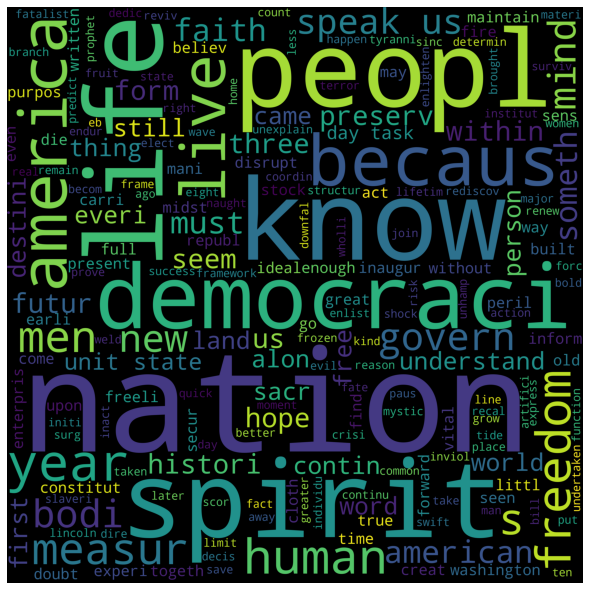

In [91]:
print("Word Cloud for Roosevelt's Speech (after cleaning)!!")
generate_wordcloud(roosevelt2)

Word Cloud for Kennedy's Speech (after cleaning)!!


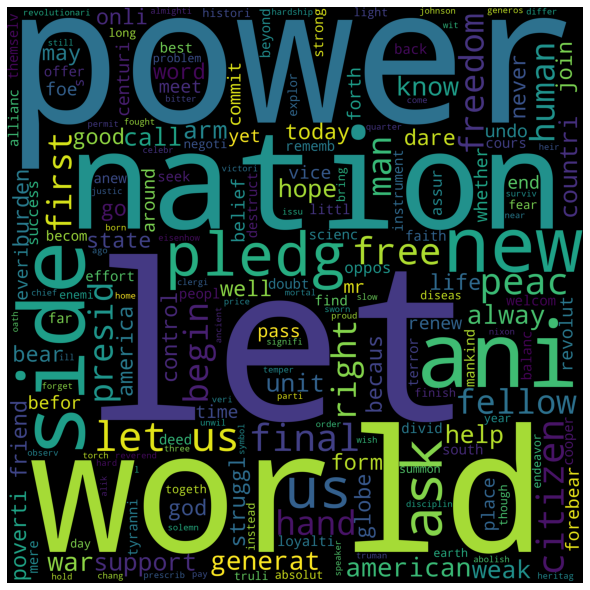

In [92]:
print("Word Cloud for Kennedy's Speech (after cleaning)!!")
generate_wordcloud(kennedy2)

Word Cloud for Nixon's Speech (after cleaning)!!


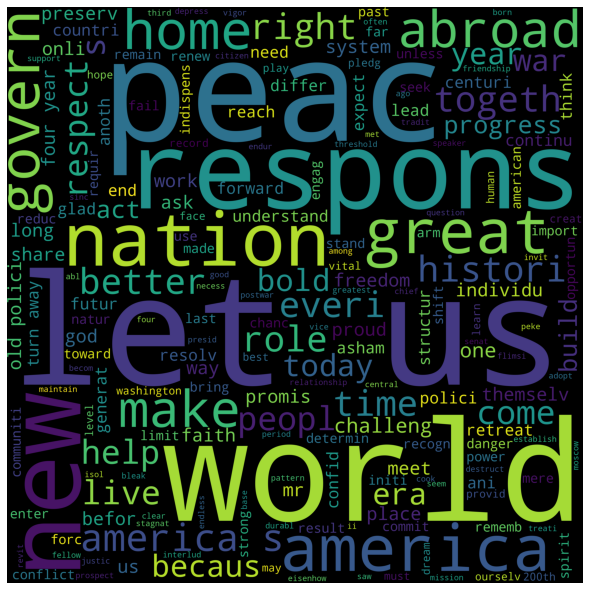

In [93]:
print("Word Cloud for Nixon's Speech (after cleaning)!!")
generate_wordcloud(nixon2)